In [1]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO
# DESTE EP.
#
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM
# DESONESTIDADE ACADÊMICA OU PLÁGIO.
#
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS 
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A 
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E 
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS 
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. 
#
#
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO 
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR 
# DESONESTIDADE ACADÊMICA. 
# 
# 
# Nome : Arthur Pilone Maia da Silva
# NUSP : 11795450	
# Turma: MAC0417
# Prof.: Ronaldo Fumio Hashimoto
##################################################################

In [43]:
import cv2 
import os
import numpy as np
import matplotlib.image as pltimg
from ImageRepo import ImageRepo

In [3]:
## Utilities

RESIZING_FACTOR = 0.25
def reduce_img(img):
	"""
		Shrinks image to 1/16 of its original size.
	"""
	
	return cv2.resize(img, (0,0), fx=RESIZING_FACTOR, fy=RESIZING_FACTOR)

def RGB2gray(img):
	"""
		Converts an image to gray scale.
	"""

	return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def create_new_dataset_from_func(new_path,original_repo,func):
	"""
		Creates a new repository at the given path by applying a funciton
	to every image from a repository.
	"""

	if os.path.isdir(new_path):
		print("Target repository already exists. Skipping repository creation.")
		return

	os.mkdir(new_path)
	
	for image_path in original_repo.get_paths_from_all_images():
		picture_name = image_path.split('/')[-1]

		original_image = pltimg.imread(image_path)

		resulting_image = func(original_image)

		cv2.imwrite(new_path + "/" + picture_name, resulting_image)
		


## Creating the new gray scale image repository

In [4]:
gray_scale_func = lambda img : RGB2gray(reduce_img(img))
create_new_dataset_from_func("originalGrayDataset",ImageRepo("./images/"), gray_scale_func)

Target repository already exists. Skipping repository creation.


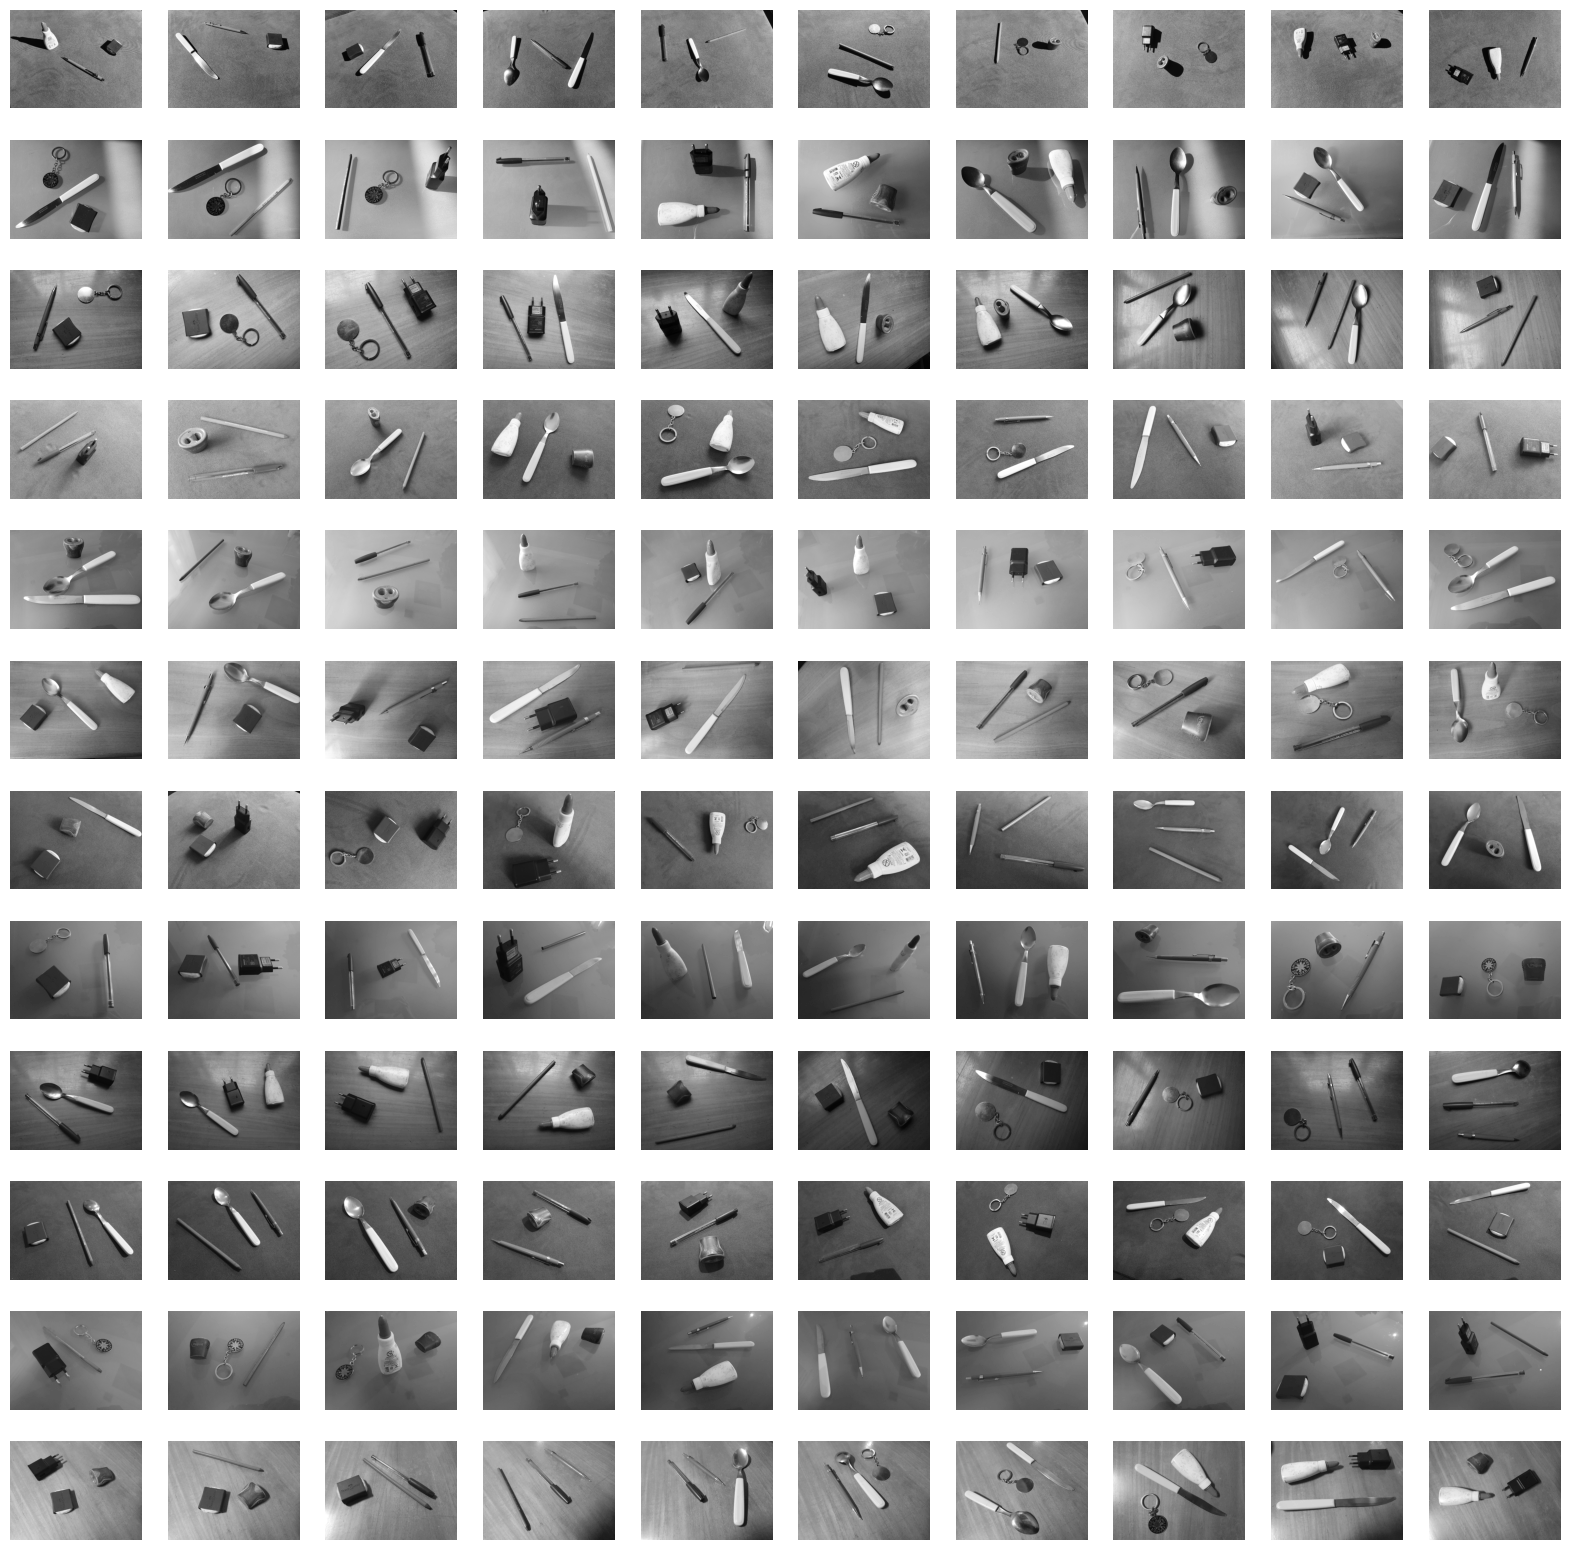

In [10]:
gray_scale_repo = ImageRepo("./originalGrayDataset/")
gray_scale_repo.draw_whole_database(force_gray=True)

## Creating the Augmented Datasets

### Utilitaries

In [50]:
def aplica_func_pixelwise(imgm,funcao):
  """
  Aplica uma função a cada pixel da imagem original.
  Devolve uma tupla com a imagem resultante e os valores minimo e máximo
  da imagem
  """
  rows = len(imgm)
  cols = len(imgm[0])

  intensidade_minima = 256
  intensidade_maxima = -1
  resultado = []
  for i in range(rows):
    resultado.append([])
    for j in range(cols):
      intst = funcao(imgm[i][j])
      resultado[i].append(intst)
      if intst < intensidade_minima:
        intensidade_minima = intst
      if intst > intensidade_maxima:
        intensidade_maxima = intst

  resultado = np.array(resultado)

  return (resultado,intensidade_minima, intensidade_maxima)

## Função auxiliar para reescalar intensidade dos pixels de uma imagem
def rescale_intensities(imgm, mini, maxi):
  rescale_pixel = lambda x : max(0,min(255,( x - mini) / (maxi - mini)*255))
  new_image,_,_ = aplica_func_pixelwise(imgm,rescale_pixel)
  return new_image

if not os.path.isdir("./augmentedDataset"):
	os.mkdir("./augmentedDataset")

### Contrast Stretching

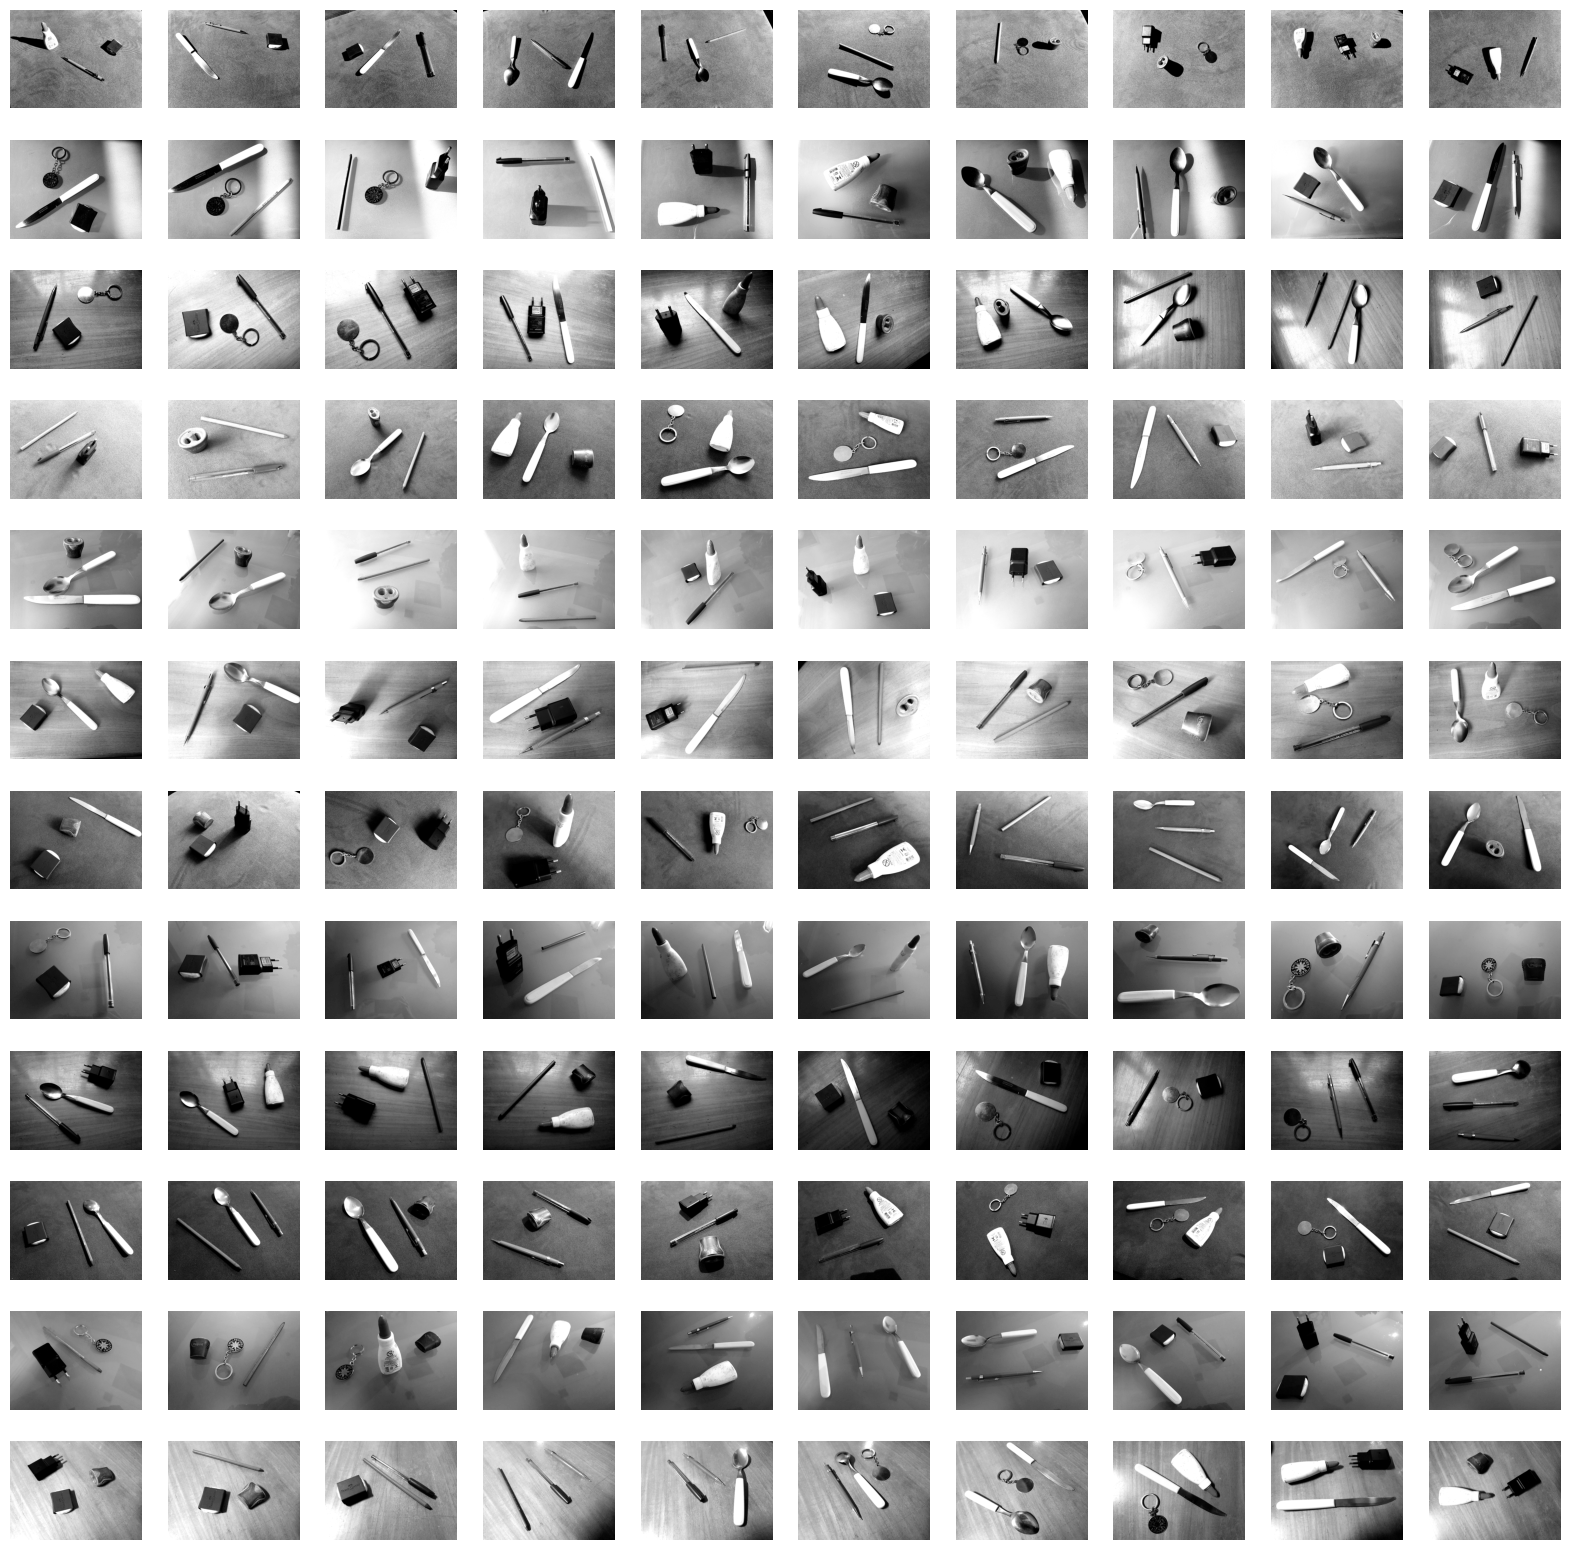

In [51]:
def contrast_stretch(img):
	min_intensity = 35
	max_intensity = 200

	new_image = rescale_intensities(img,min_intensity,max_intensity)

	return new_image

create_new_dataset_from_func("./augmentedDataset/contrast_stretch",ImageRepo("./originalGrayDataset/"), contrast_stretch)

gray_scale_repo = ImageRepo("./augmentedDataset/contrast_stretch/")
gray_scale_repo.draw_whole_database(force_gray=True)